In [42]:
import ROOT as r
import sys
import os

In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
r.gSystem.Load("../lib/libdataProducts.so")
r.gSystem.Load("../lib/libunpackers.so")

1

In [45]:
from nearline_helpers import *

In [46]:
# f = r.TFile("~/nearline_hists_run00207_00000.root")
# f = r.TFile("../bin/run00207_00000.mid.root")
# f = r.TFile("../bin/run00234_00000.mid.root")
# f = r.TFile("../bin/run00230_00000.mid.root")
f = r.TFile("../bin/run00245_00000.mid.root")
# f = r.TFile("../bin/run00238_00000.mid.root")
# f = r.TFile("../bin/run00235_00000.mid.root")
# f = r.TFile("./data/nearline_hists_run00234_00000.root")
f.ls()

TFile**		../bin/run00245_00000.mid.root	
 TFile*		../bin/run00245_00000.mid.root	
  KEY: TProcessID	ProcessID0;1	c7b2ed90-7196-11ee-9825-42d716acbeef
  KEY: TTree	tree;5	tree [current cycle]
  KEY: TTree	tree;4	tree [backup cycle]
  KEY: TDirectoryFile	splines;1	splines
  KEY: TDirectoryFile	hists;1	hists


In [47]:
f.Get("hists/uncalibrated").ls()

TDirectoryFile*		uncalibrated	uncalibrated
 KEY: TH1I	uncalibrated_0_1_0;1	Uncalibrated Restricted Width Integrals: Crate 0 | AMC 1 | Channel 0
 KEY: TH1I	uncalibrated_0_1_1;1	Uncalibrated Restricted Width Integrals: Crate 0 | AMC 1 | Channel 1
 KEY: TH1I	uncalibrated_0_1_2;1	Uncalibrated Restricted Width Integrals: Crate 0 | AMC 1 | Channel 2
 KEY: TH1I	uncalibrated_0_1_3;1	Uncalibrated Restricted Width Integrals: Crate 0 | AMC 1 | Channel 3
 KEY: TH1I	uncalibrated_0_1_4;1	Uncalibrated Restricted Width Integrals: Crate 0 | AMC 1 | Channel 4
 KEY: TH1I	uncalibrated_0_2_0;1	Uncalibrated Restricted Width Integrals: Crate 0 | AMC 2 | Channel 0
 KEY: TH1I	uncalibrated_0_2_1;1	Uncalibrated Restricted Width Integrals: Crate 0 | AMC 2 | Channel 1
 KEY: TH1I	uncalibrated_0_2_2;1	Uncalibrated Restricted Width Integrals: Crate 0 | AMC 2 | Channel 2
 KEY: TH1I	uncalibrated_0_2_3;1	Uncalibrated Restricted Width Integrals: Crate 0 | AMC 2 | Channel 3
 KEY: TH1I	uncalibrated_0_2_4;1	Uncalibrated Res

In [48]:
f.Get("splines").ls()

TDirectoryFile*		splines	splines
 KEY: TSpline3	spline_1_0;1	spline_1_0
 KEY: TSpline3	spline_1_1;1	spline_1_1
 KEY: TSpline3	spline_1_2;1	spline_1_2
 KEY: TSpline3	spline_1_3;1	spline_1_3
 KEY: TSpline3	spline_1_4;1	spline_1_4
 KEY: TSpline3	spline_2_0;1	spline_2_0
 KEY: TSpline3	spline_2_1;1	spline_2_1
 KEY: TSpline3	spline_2_2;1	spline_2_2
 KEY: TSpline3	spline_2_3;1	spline_2_3
 KEY: TSpline3	spline_2_4;1	spline_2_4
 KEY: dataProducts::HistogramMaker	h;1	


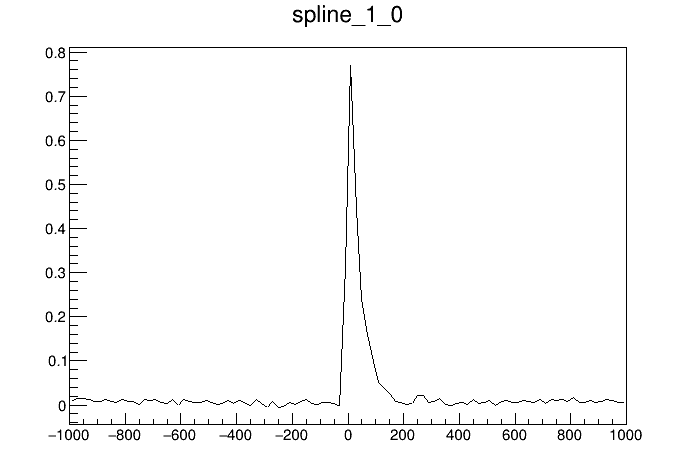

In [49]:
c = r.TCanvas()
f.Get("splines/spline_1_0").Draw()
c.Draw()

In [50]:
t = f.Get("tree")
t.Print()

******************************************************************************
*Tree    :tree      : tree                                                   *
*Entries :     9641 : Total =       329148183 bytes  File  Size =  123468708 *
*        :          : Tree compression factor =   2.67                       *
******************************************************************************
*Br    0 :waveforms_raw : Int_t waveforms_raw_                               *
*Entries :     9641 : Total  Size=     132809 bytes  File Size  =      12635 *
*Baskets :        5 : Basket Size=      32000 bytes  Compression=   6.14     *
*............................................................................*
*Br    1 :waveforms_raw.fUniqueID : UInt_t fUniqueID[waveforms_raw_]         *
*Entries :     9641 : Total  Size=     425641 bytes  File Size  =     151959 *
*Baskets :        8 : Basket Size=     294400 bytes  Compression=   2.80     *
*...................................................

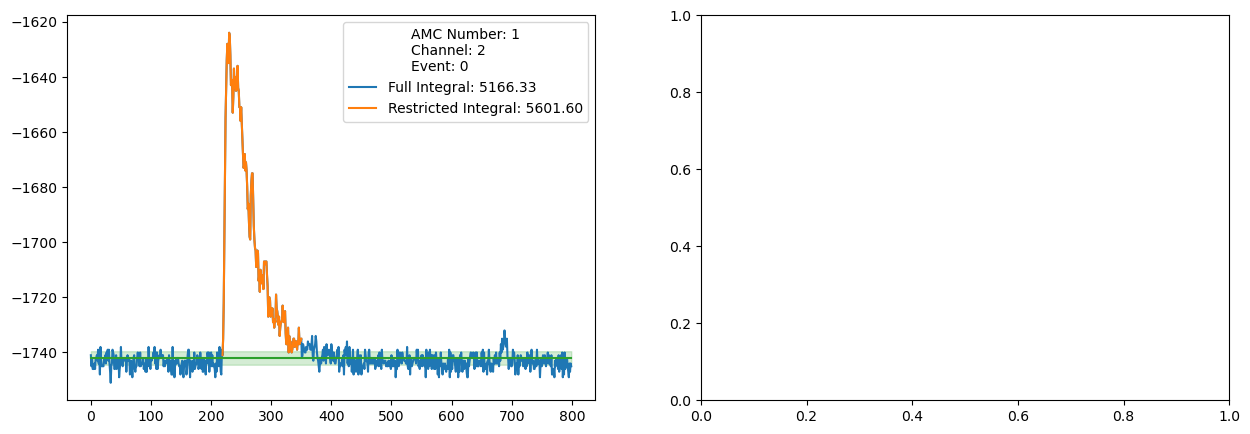

In [41]:
# entry = 784
entry = 0
# entry = 78
# entry = 773
t.GetEntry(entry)
w = t.integrals[0]
# inti = t.fits[0]
fig,ax = plt.subplots(1,2,figsize=(15,5))
plot_integral(w,ax=ax[0])
# plot_pulse_fit(inti, f,ax=ax[1])
plt.show()

Name: dataProducts::Waveform Title:  Name: spline_1_2 Title: spline_1_2


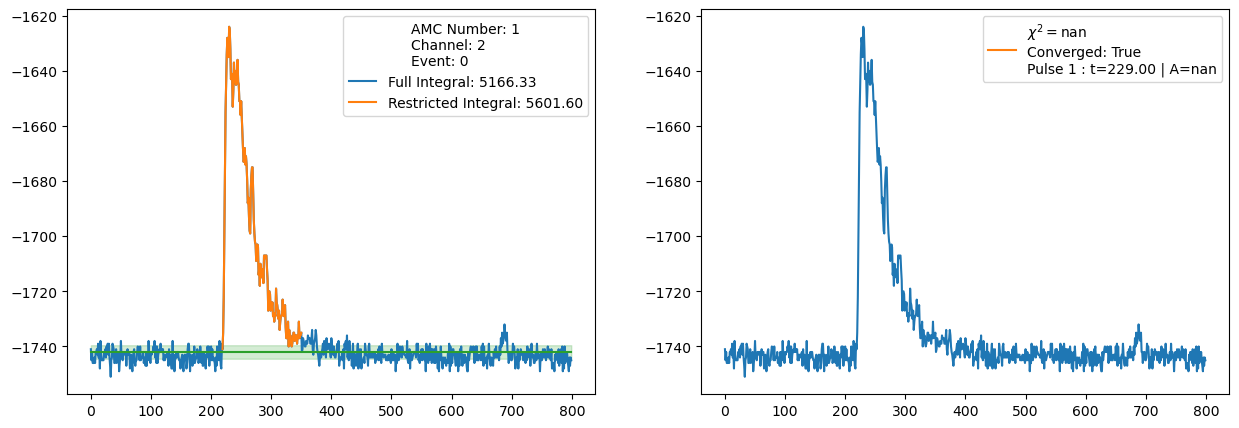

In [51]:
# entry = 784
entry = 0
# entry = 78
# entry = 773
t.GetEntry(entry)
w = t.integrals[0]
inti = t.fits[0]
fig,ax = plt.subplots(1,2,figsize=(15,5))
plot_integral(w,ax=ax[0])
plot_pulse_fit(inti, f,ax=ax[1])
plt.show()

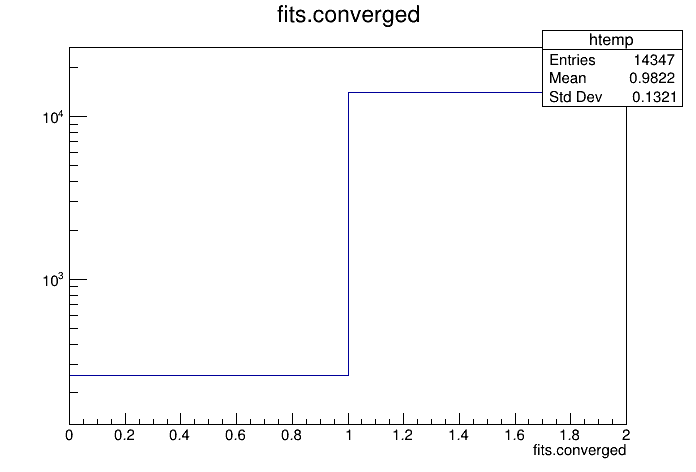

In [52]:
c = r.TCanvas()
t.Draw("fits.converged")
c.SetLogy()
c.Draw()

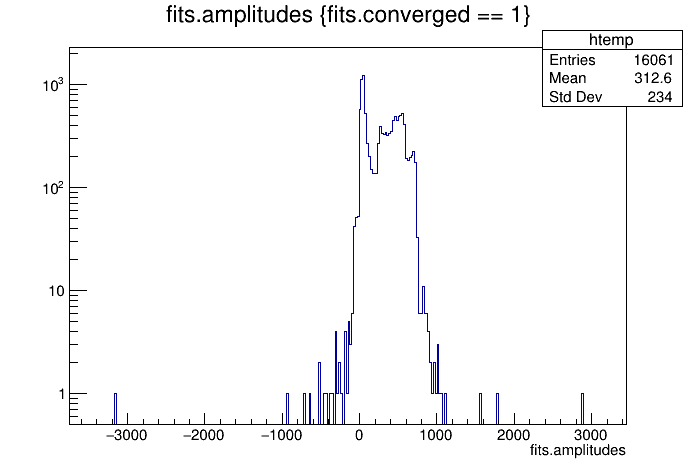

In [53]:
c = r.TCanvas()
t.Draw("fits.amplitudes", "fits.converged == 1")
c.SetLogy()
c.Draw()

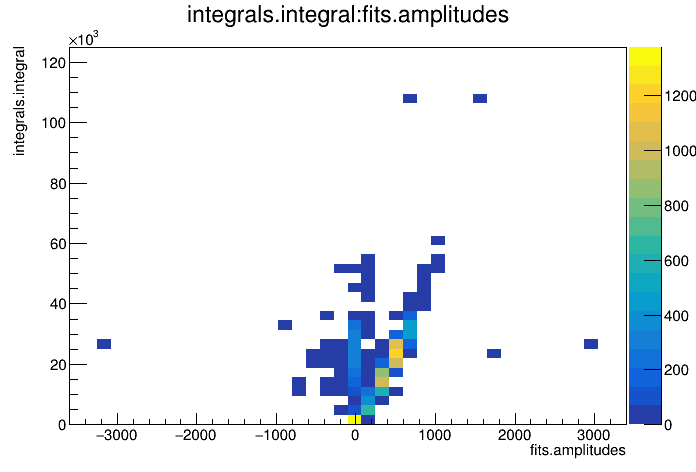

In [54]:
c = r.TCanvas()
t.Draw("integrals.integral:fits.amplitudes", "","colz")
# c.SetLogy()
c.Draw()

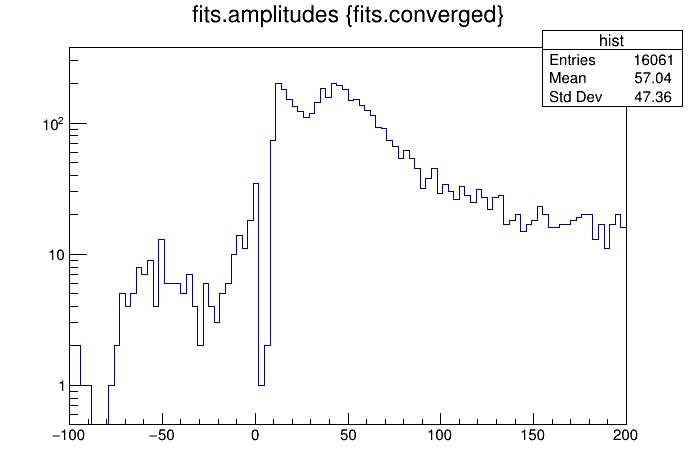

In [55]:
c = r.TCanvas()
t.Draw("fits.amplitudes>>hist(100,-100,200)","fits.converged")
c.SetLogy()
c.Draw()

---

10


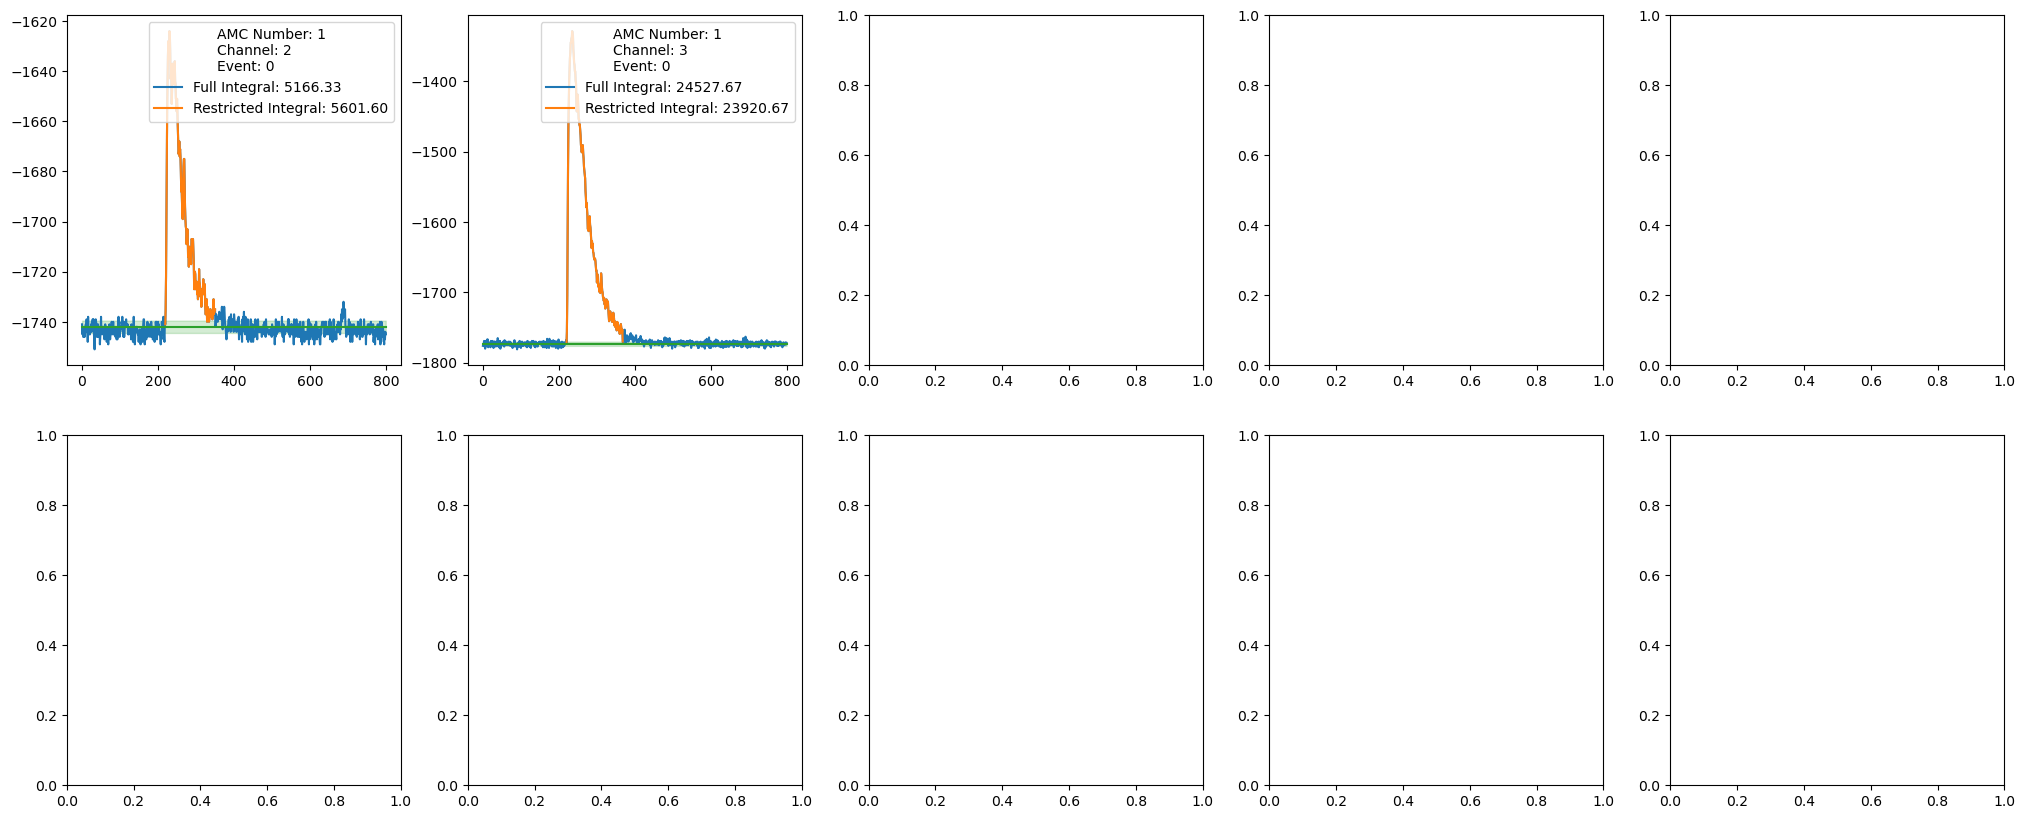

10


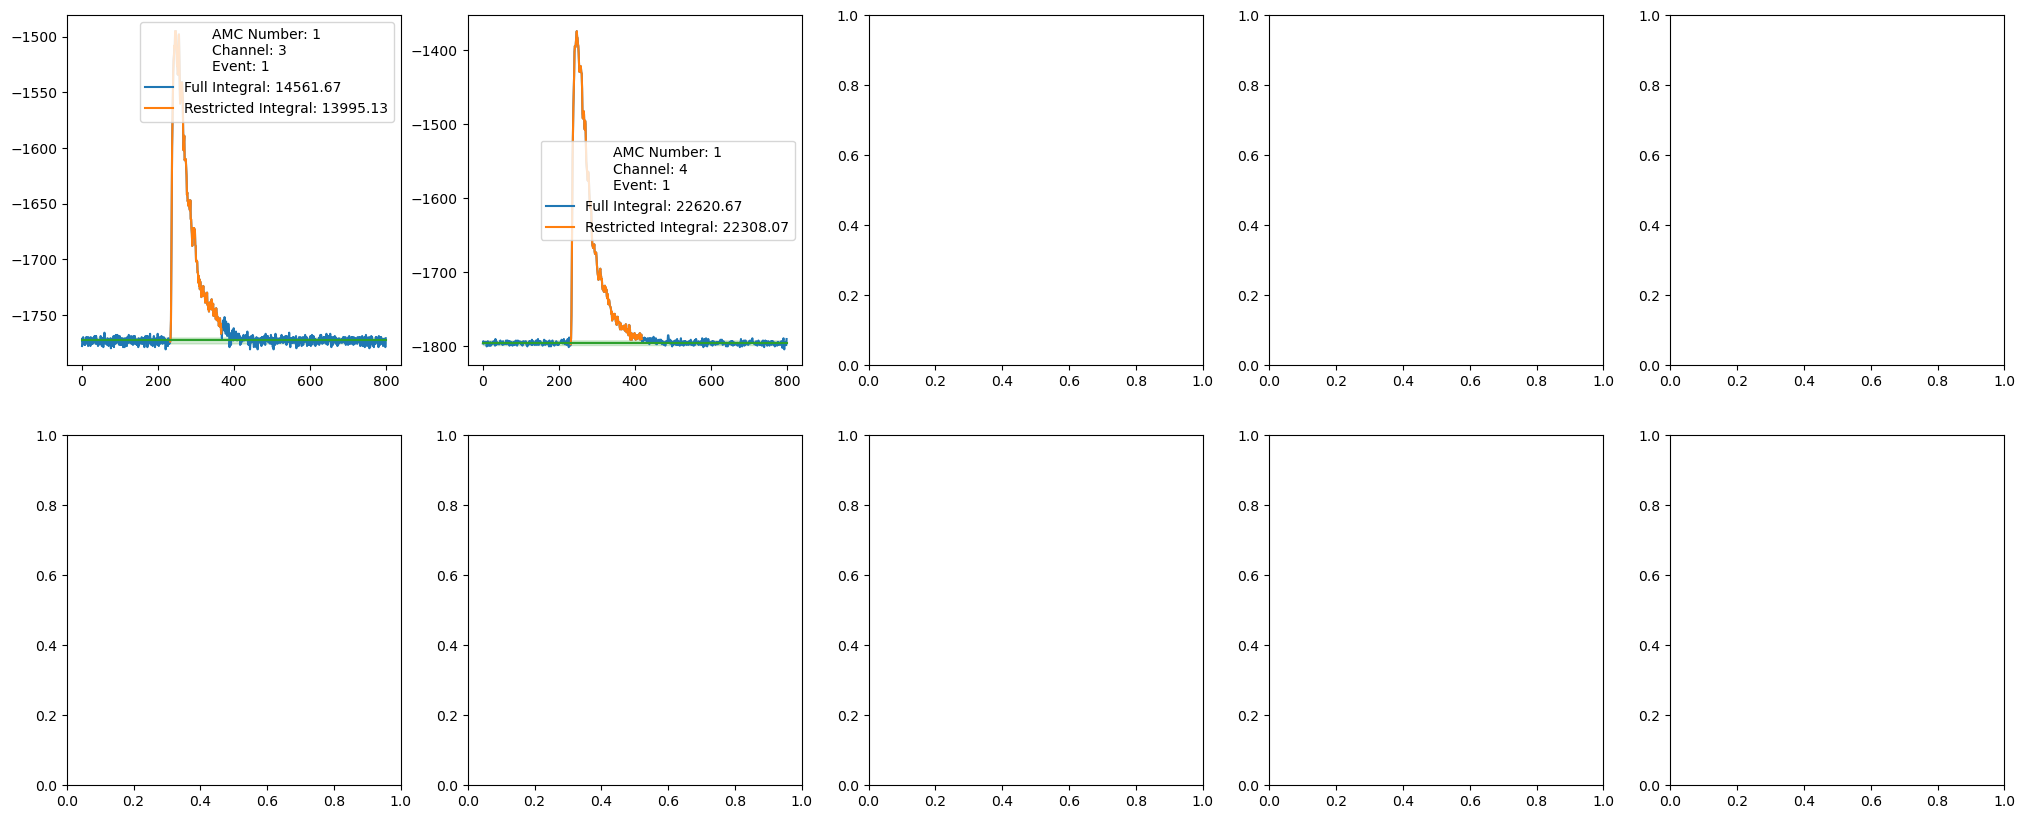

10


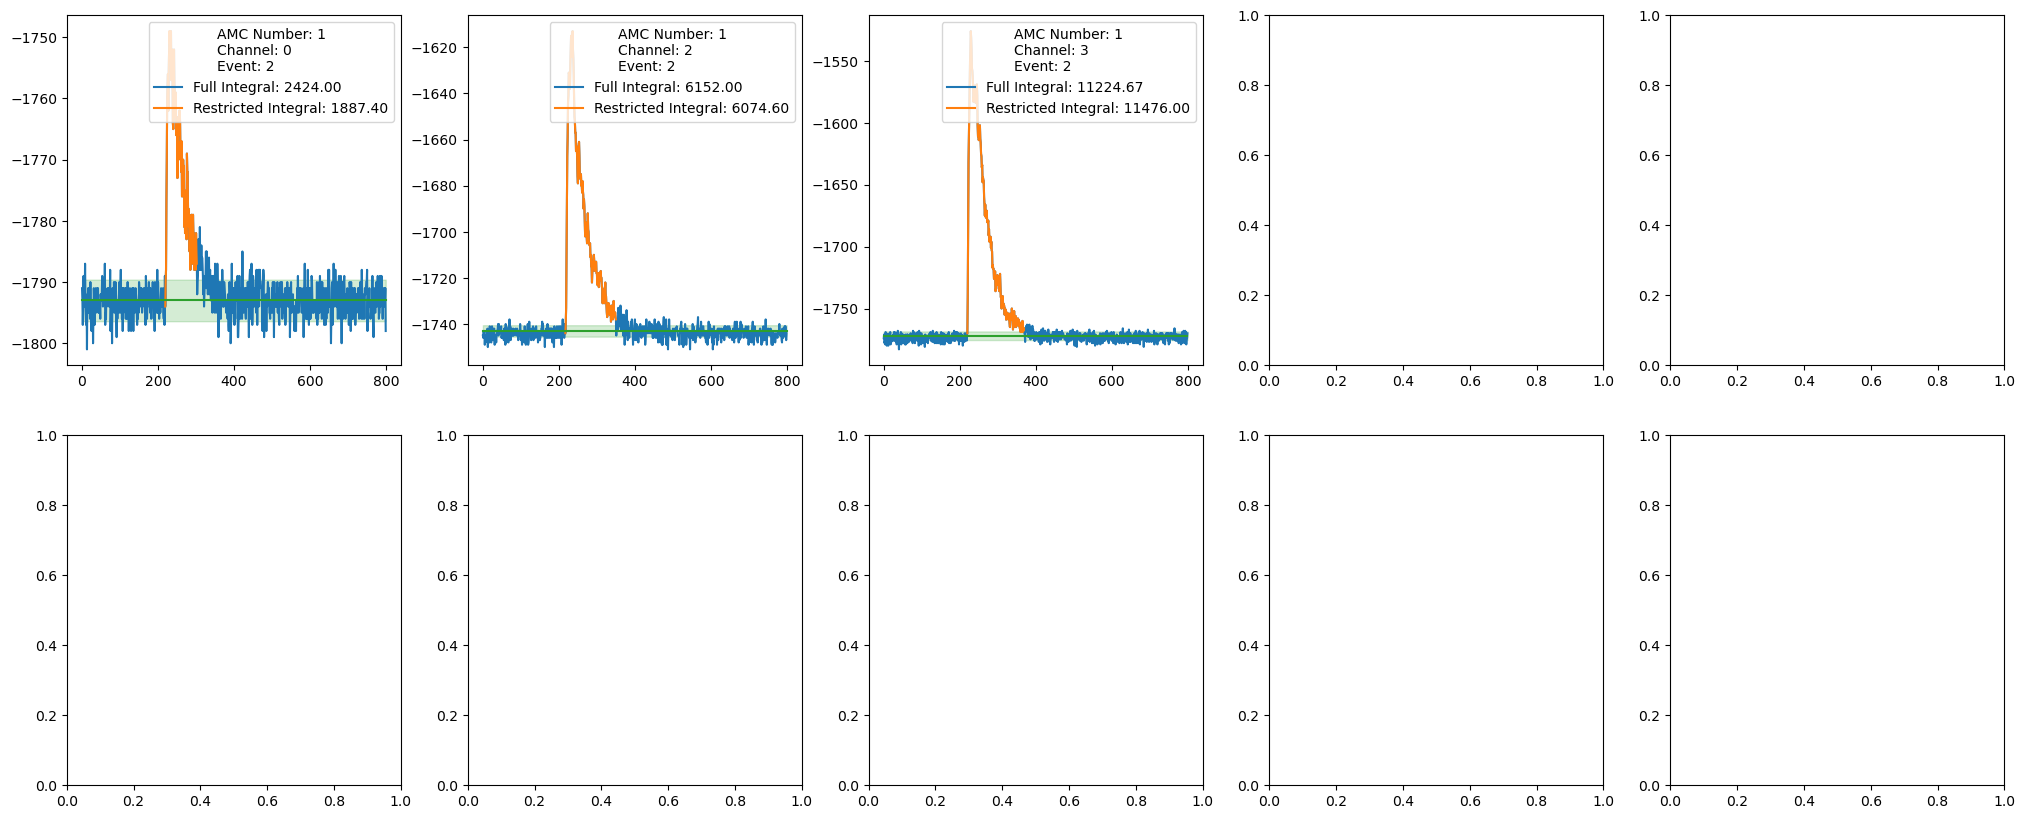

10


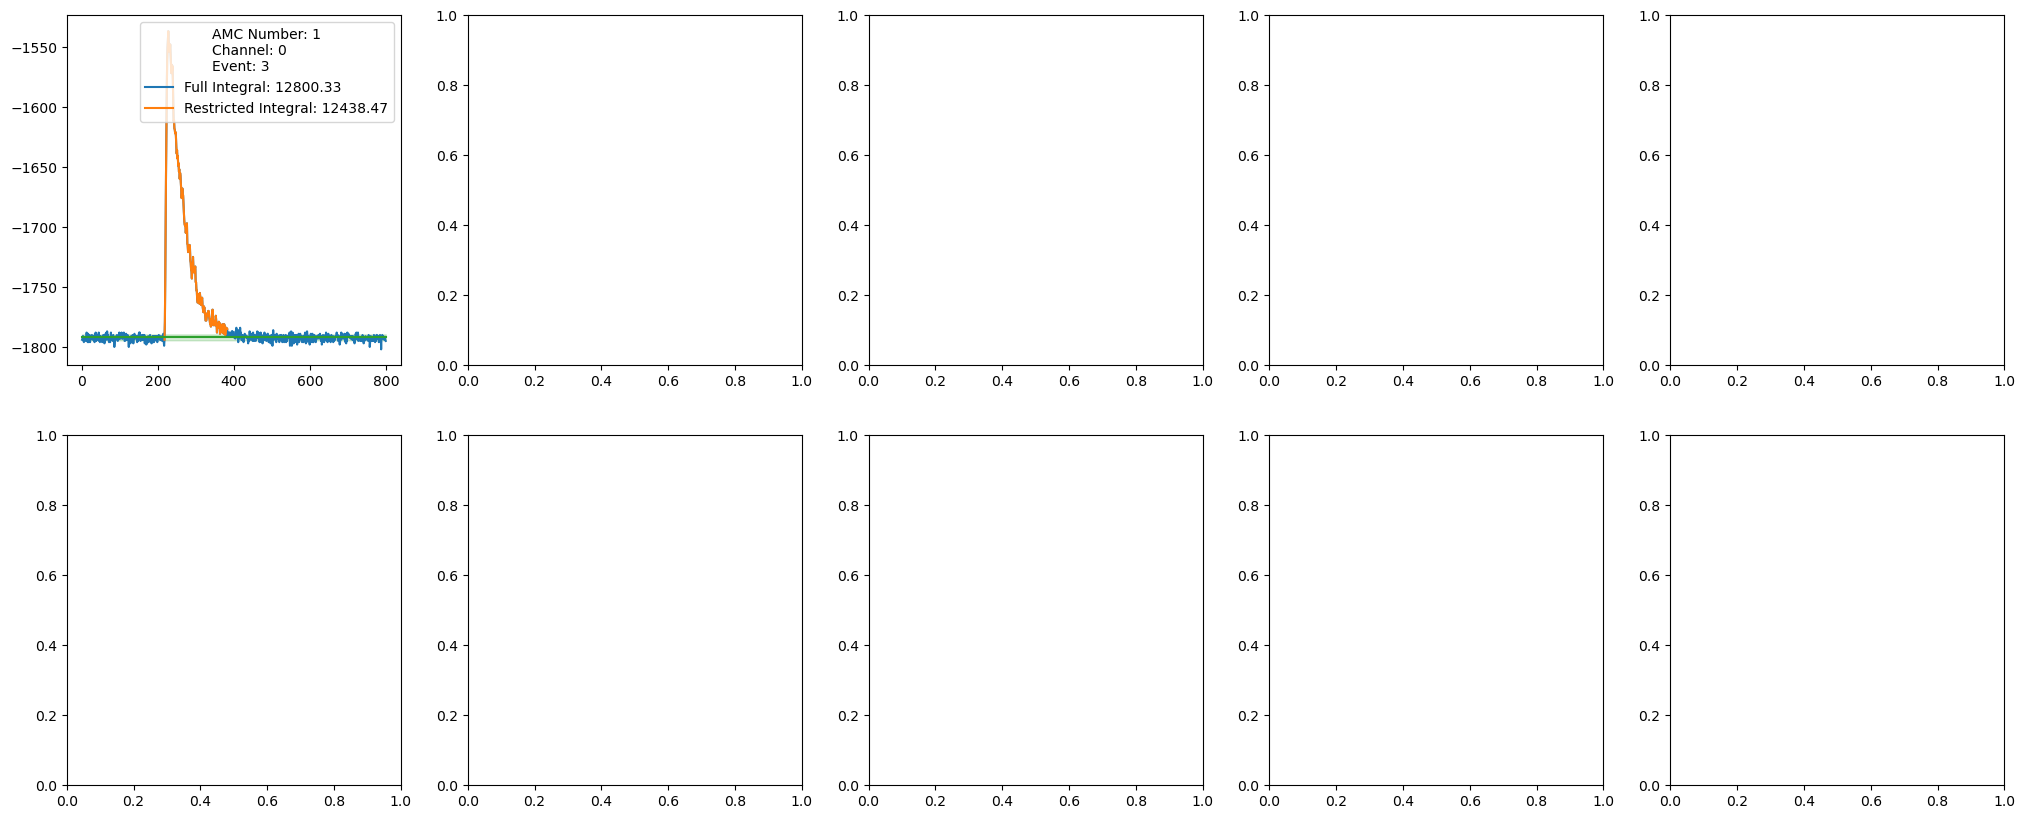

10


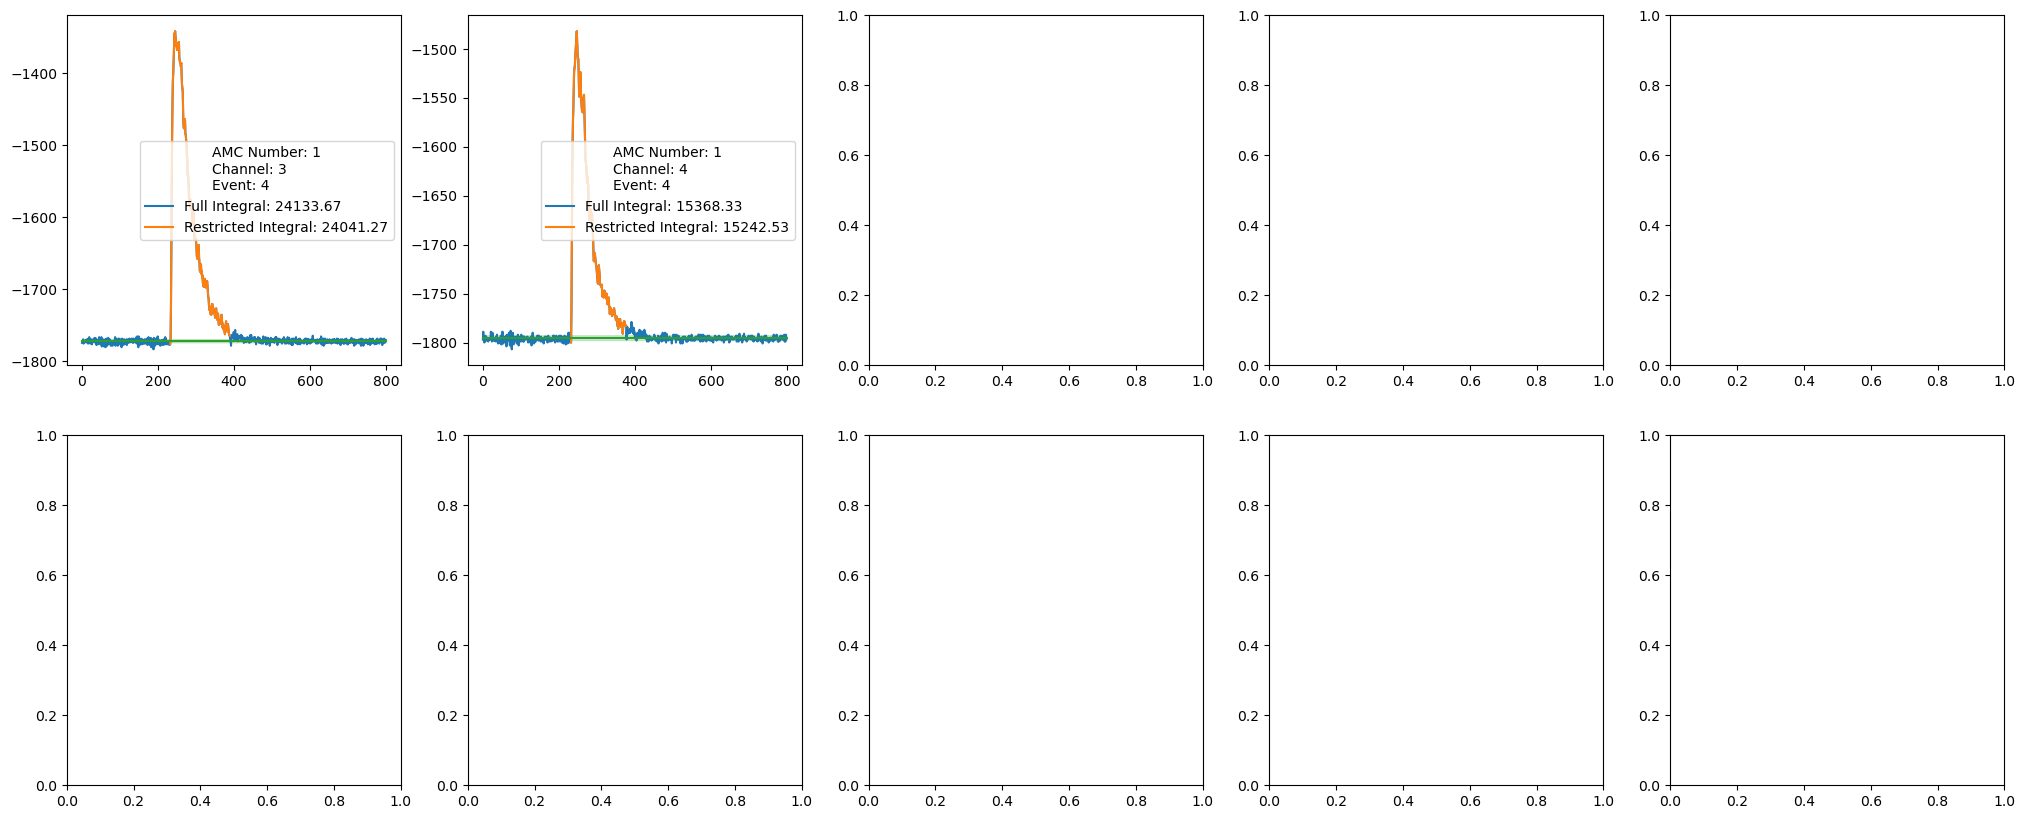

10


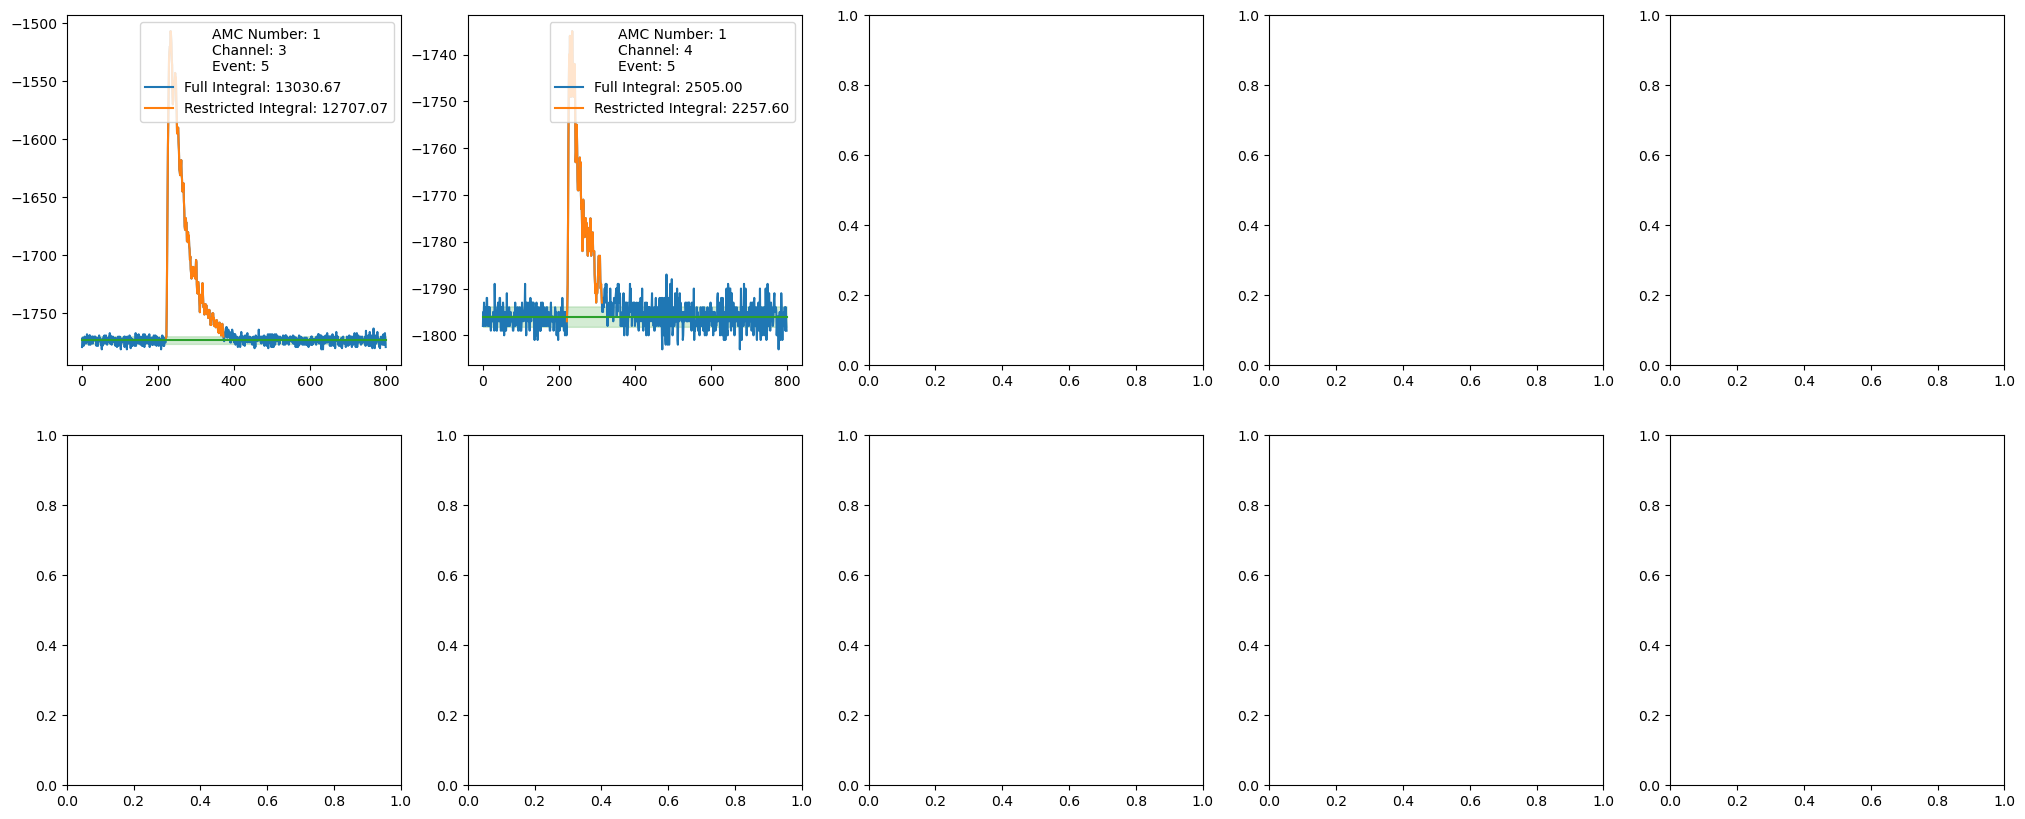

In [61]:
for i, e in enumerate(t):
    if i > 5:
        break 
    nfits = len(e.waveforms)
    print(nfits)
    fig,ax = plt.subplots(2,5,figsize=(25,10))
    for j, wfi in enumerate(t.integrals):
        axi = ax.ravel()[j]
        plot_integral(wfi,axi)
    plt.show()

In [ ]:
for i, e in enumerate(t):
    # if i > 5:
    #     break 
    nfits = len(e.waveforms)
    print(nfits)
    fig,ax = plt.subplots(2,5,figsize=(25,10))
    for j, wfi in enumerate(t.integrals):
        axi = ax.ravel()[j]
        plot_integral(wfi,axi)
    plt.show()

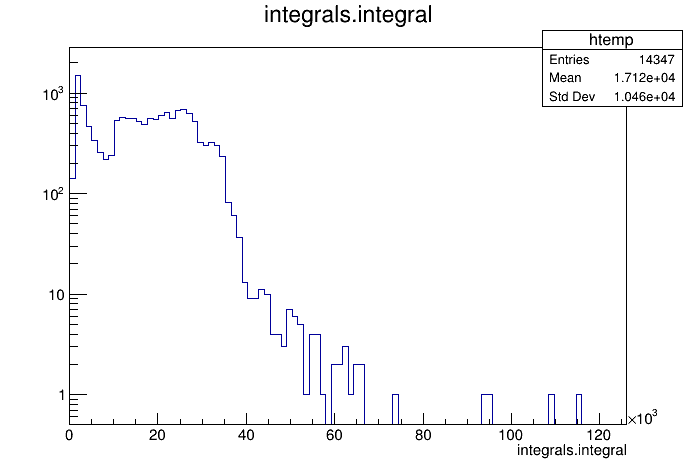

In [64]:
c = r.TCanvas()
t.Draw("integrals.integral")
c.SetLogy()
c.Draw()

---

In [56]:
counter = 0
limit = 3
for i, e in enumerate(t):
    for j, wf in enumerate(e.integrals):
        inti = e.fits[j]
        if(wf.integral < 100 and inti.nfit > 0):
            fig,ax = plt.subplots(1,2,figsize=(15,5))
            plot_integral(wf,ax=ax[0])
            plot_pulse_fit(inti, f,ax=ax[1])
            ax[0].set_title("Pulse Integration Result")
            ax[1].set_title("Pulse Fit Result")
            plt.show()

            inti = e.fits[j]

            counter += 1
            if(counter > limit):
                break
    if(counter > limit):
        break
            

Name: dataProducts::Waveform Title:  Name: spline_1_2 Title: spline_1_2


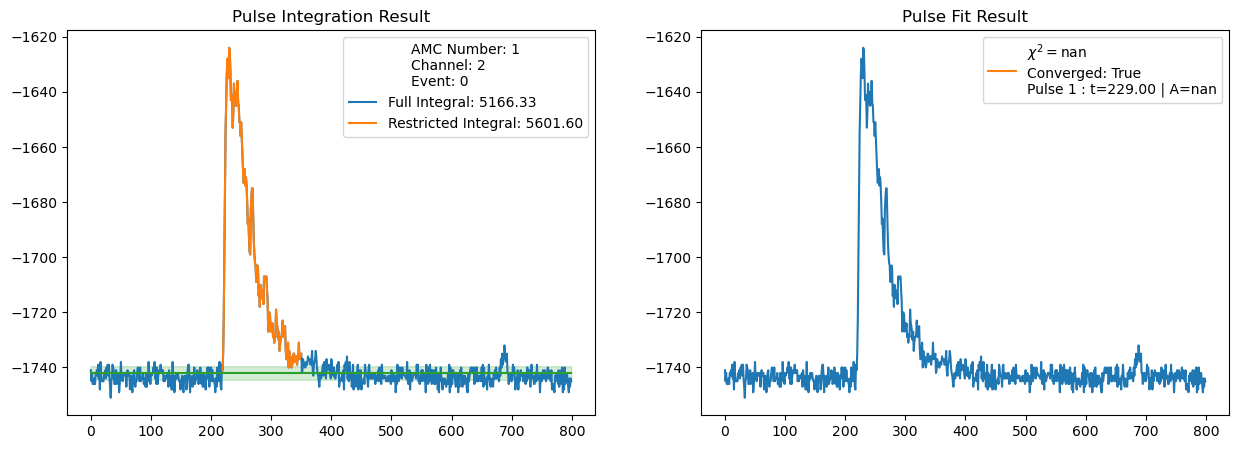

Name: dataProducts::Waveform Title:  Name: spline_1_3 Title: spline_1_3


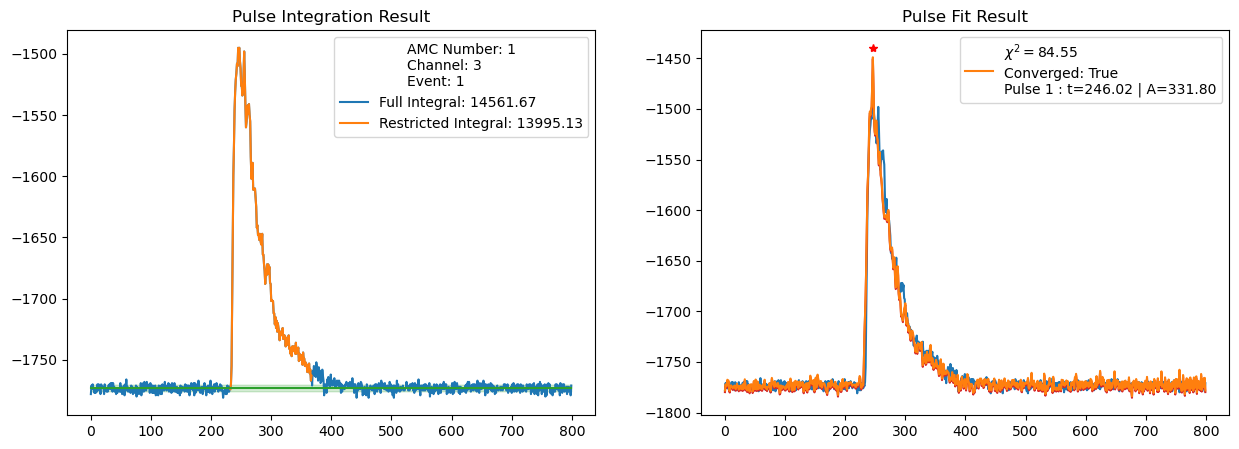

Name: dataProducts::Waveform Title:  Name: spline_1_4 Title: spline_1_4


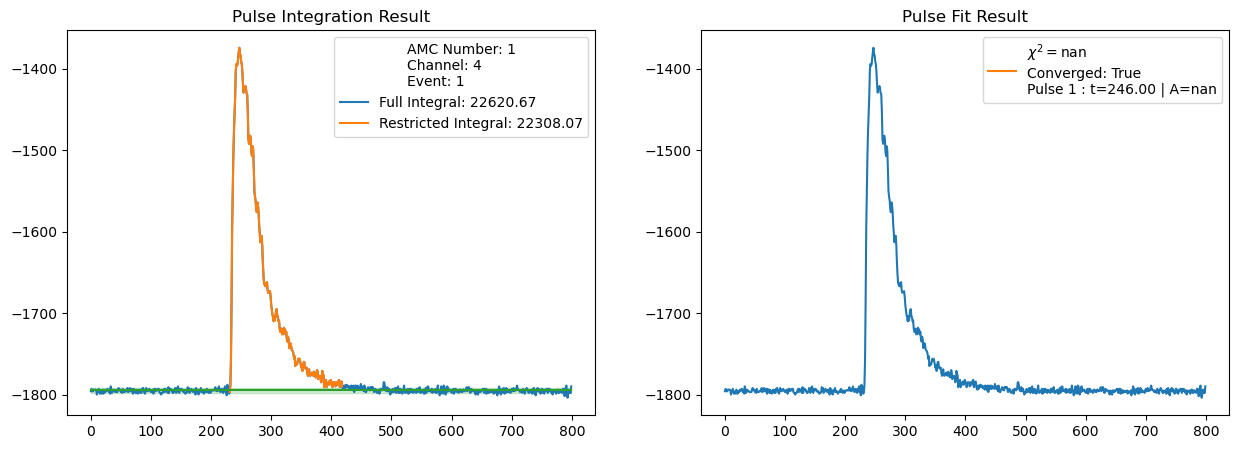

Name: dataProducts::Waveform Title:  Name: spline_1_0 Title: spline_1_0


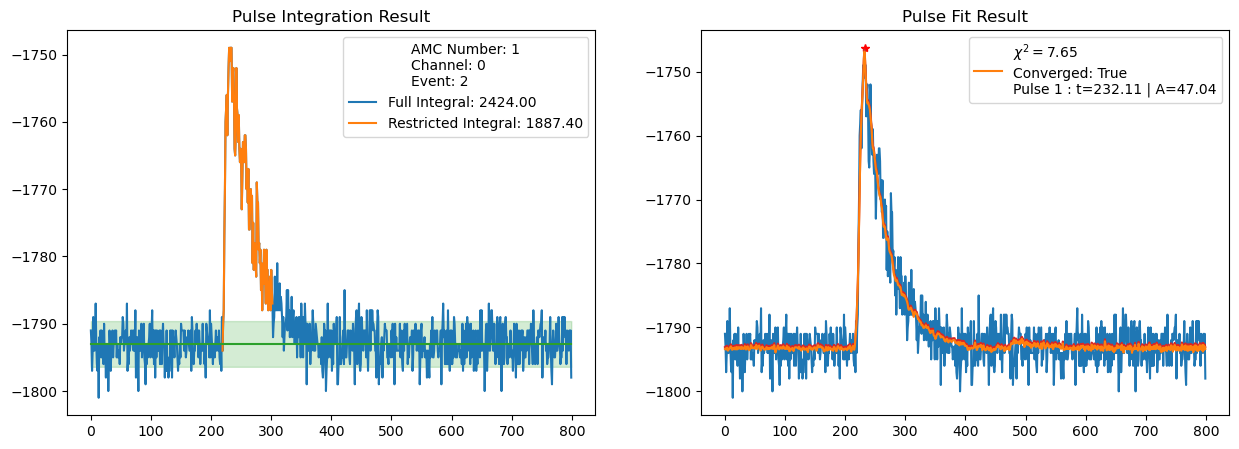

In [57]:
counter = 0
limit = 3
for i, e in enumerate(t):
    for j, wf in enumerate(e.integrals):
        inti = e.fits[j]
        # if(wf.integral > 1e3 and inti.nfit > 1):
        if(wf.integral > 1e3 and inti.nfit == 1):
            fig,ax = plt.subplots(1,2,figsize=(15,5))
            plot_integral(wf,ax=ax[0])
            plot_pulse_fit(inti,f,ax=ax[1])
            ax[0].set_title("Pulse Integration Result")
            ax[1].set_title("Pulse Fit Result")
            plt.show()

            inti = e.fits[j]

            counter += 1
            if(counter > limit):
                break
    if(counter > limit):
        break
            

Name: dataProducts::Waveform Title:  Name: spline_1_3 Title: spline_1_3


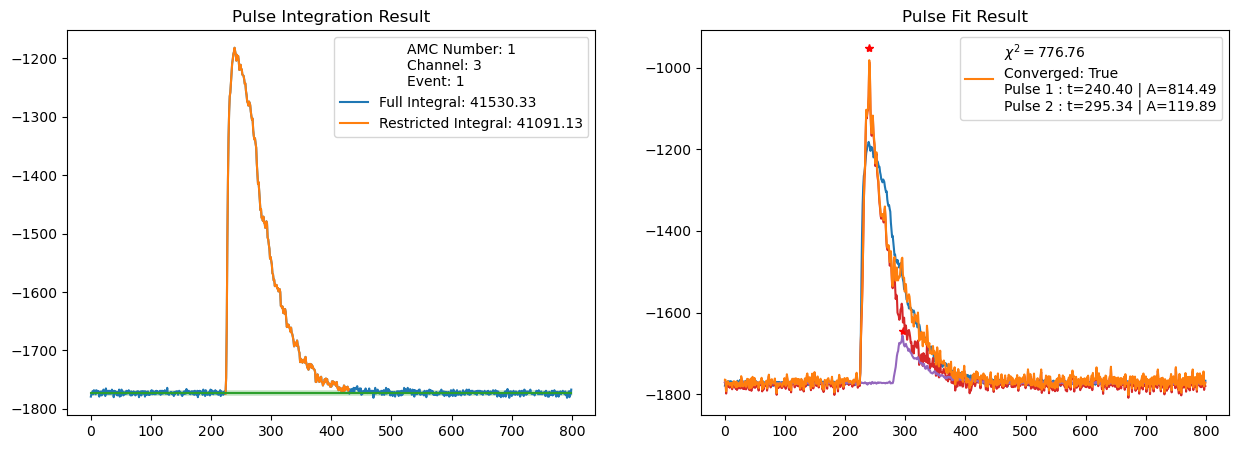

Name: dataProducts::Waveform Title:  Name: spline_1_3 Title: spline_1_3


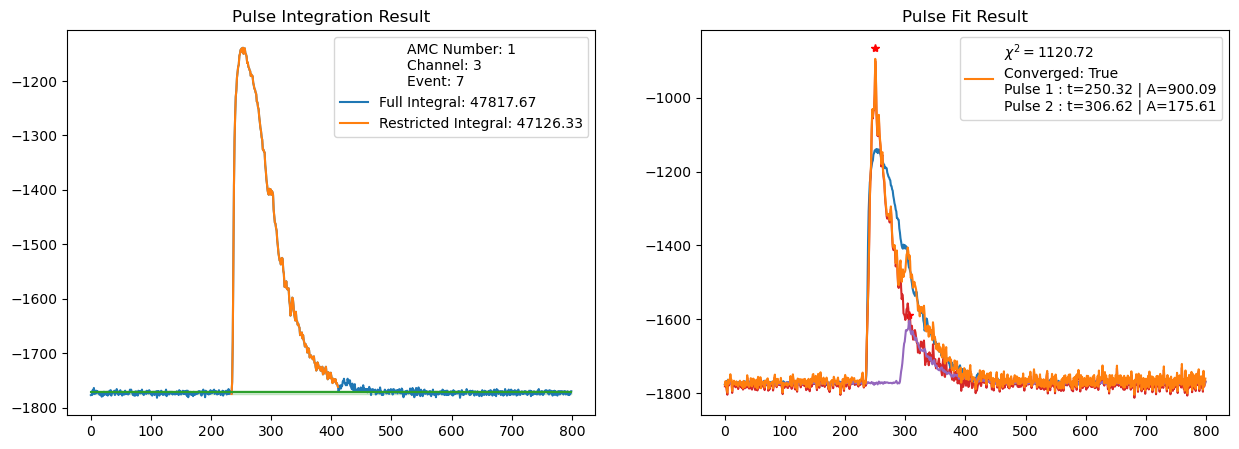

Name: dataProducts::Waveform Title:  Name: spline_1_3 Title: spline_1_3


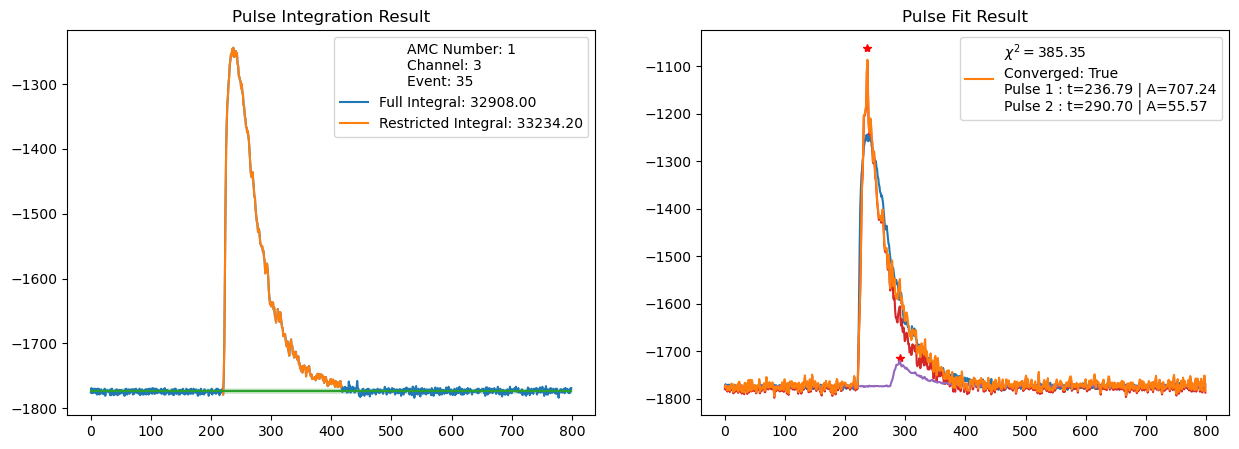

Name: dataProducts::Waveform Title:  Name: spline_1_3 Title: spline_1_3


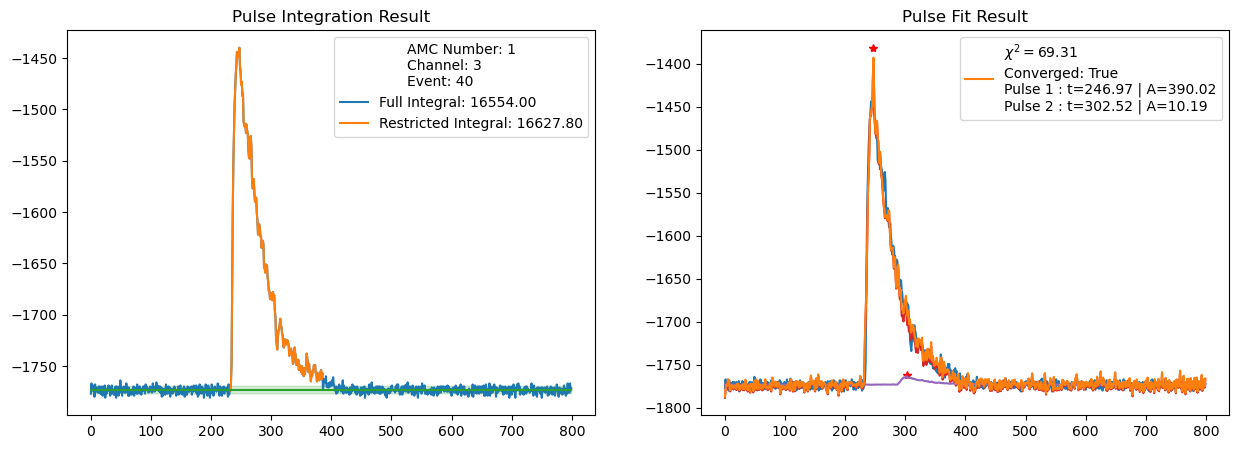

In [17]:
counter = 0
limit = 3
for i, e in enumerate(t):
    for j, wf in enumerate(e.integrals):
        inti = e.fits[j]
        if(wf.integral > 1e3 and inti.nfit > 1):
        # if(wf.integral > 1e3 and inti.nfit == 1):
            fig,ax = plt.subplots(1,2,figsize=(15,5))
            plot_integral(wf,ax=ax[0])
            plot_pulse_fit(inti,f,ax=ax[1])
            ax[0].set_title("Pulse Integration Result")
            ax[1].set_title("Pulse Fit Result")
            plt.show()

            inti = e.fits[j]

            counter += 1
            if(counter > limit):
                break
    if(counter > limit):
        break
            

In [18]:
counter = 0
limit = 3
for i, e in enumerate(t):
    for j, wf in enumerate(e.integrals):
        inti = e.fits[j]
        # if(wf.integral > 1e3 and inti.nfit > 1):
        if(inti.chi2 < 0 ):
            print(i,j,e)
            fig,ax = plt.subplots(1,2,figsize=(15,5))
            plot_integral(wf,ax=ax[0])
            plot_pulse_fit(inti,f,ax=ax[1])
            ax[0].set_title("Pulse Integration Result")
            ax[1].set_title("Pulse Fit Result")
            plt.show()

            inti = e.fits[j]

            counter += 1
            if(counter > limit):
                break
    if(counter > limit):
        break
            

9 2 Name: tree Title: tree
Name: dataProducts::Waveform Title:  Name: spline_1_3 Title: spline_1_3


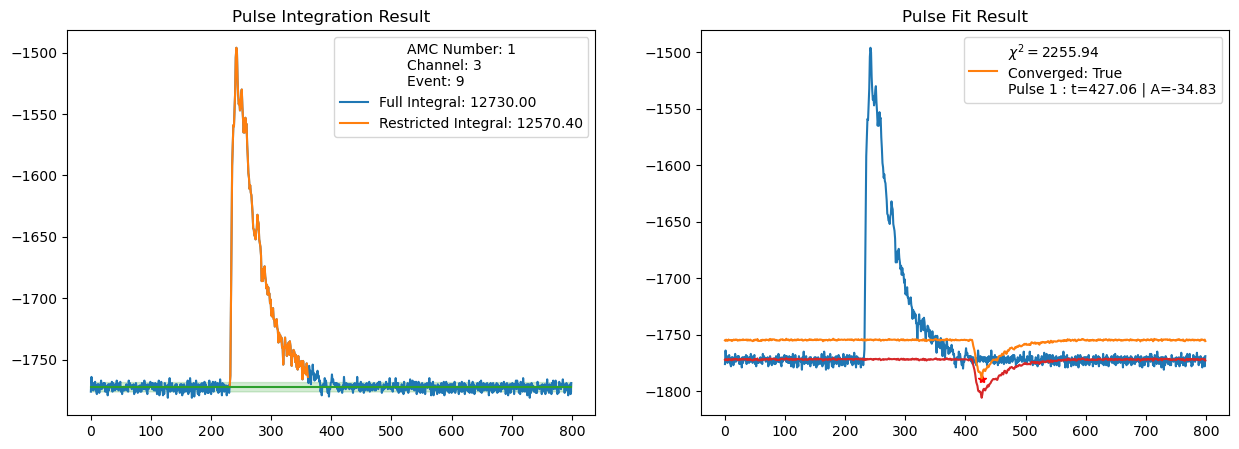

42 1 Name: tree Title: tree
Name: dataProducts::Waveform Title:  Name: spline_1_1 Title: spline_1_1


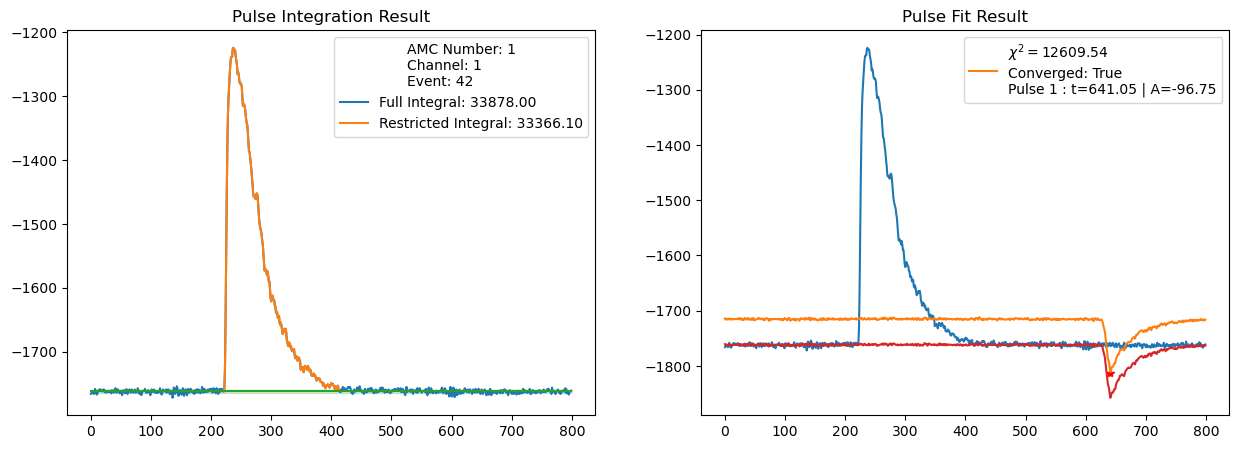

57 1 Name: tree Title: tree
Name: dataProducts::Waveform Title:  Name: spline_1_3 Title: spline_1_3


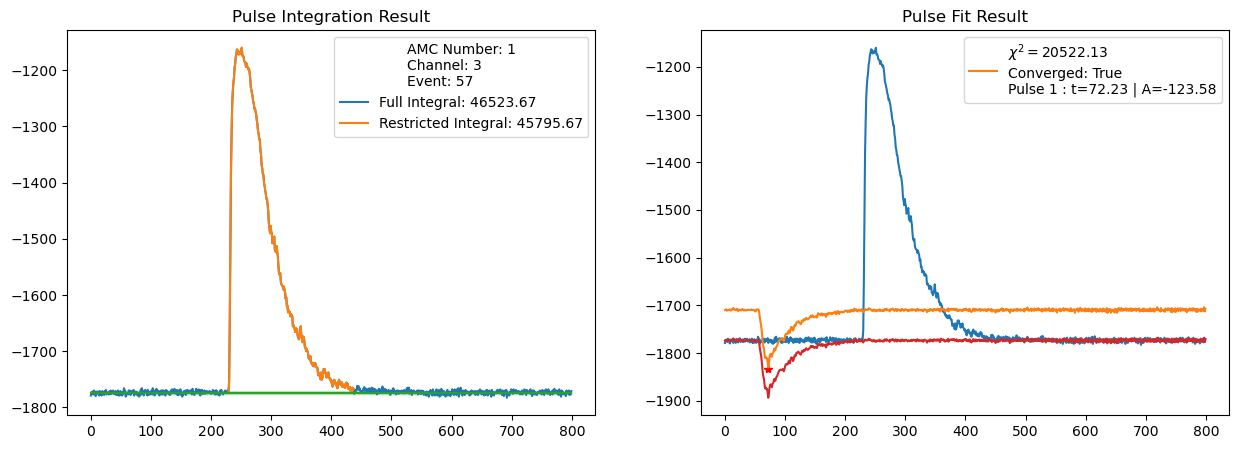

59 0 Name: tree Title: tree
Name: dataProducts::Waveform Title:  Name: spline_1_0 Title: spline_1_0


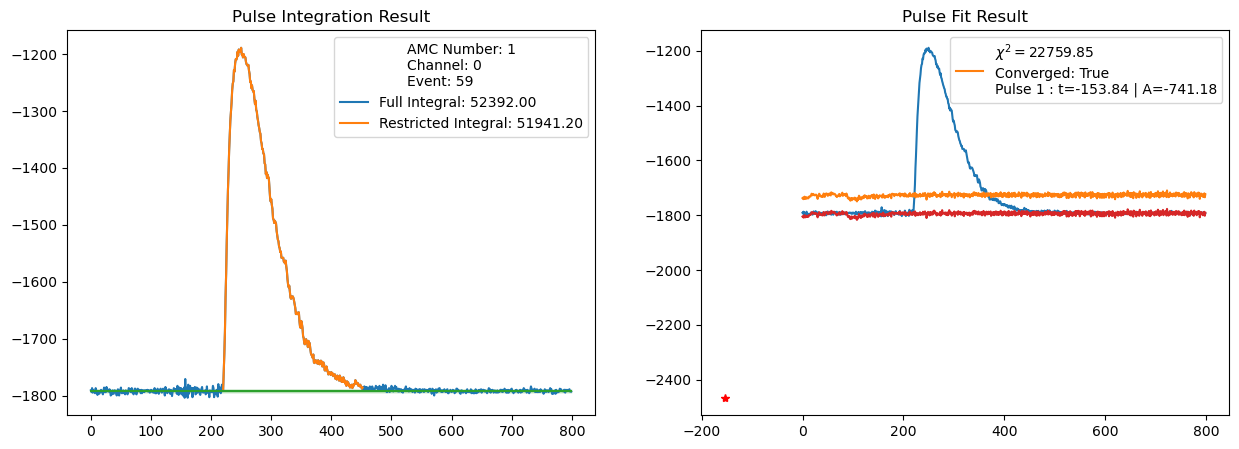

In [19]:
counter = 0
limit = 3
for i, e in enumerate(t):
    for j, wf in enumerate(e.integrals):
        inti = e.fits[j]
        # if(wf.integral > 1e3 and inti.nfit > 1):
        if(inti.nfit > 0 and inti.amplitudes[0] < 0 ):
            print(i,j,e)
            fig,ax = plt.subplots(1,2,figsize=(15,5))
            plot_integral(wf,ax=ax[0])
            plot_pulse_fit(inti,f,ax=ax[1])
            ax[0].set_title("Pulse Integration Result")
            ax[1].set_title("Pulse Fit Result")
            plt.show()

            inti = e.fits[j]

            counter += 1
            if(counter > limit):
                break
    if(counter > limit):
        break
            

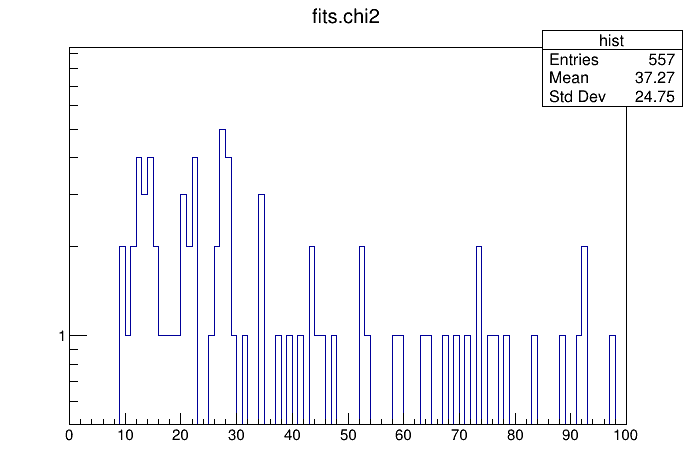

In [20]:
t.Draw("fits.chi2>>hist(100,0,100)","","")
c.Draw()

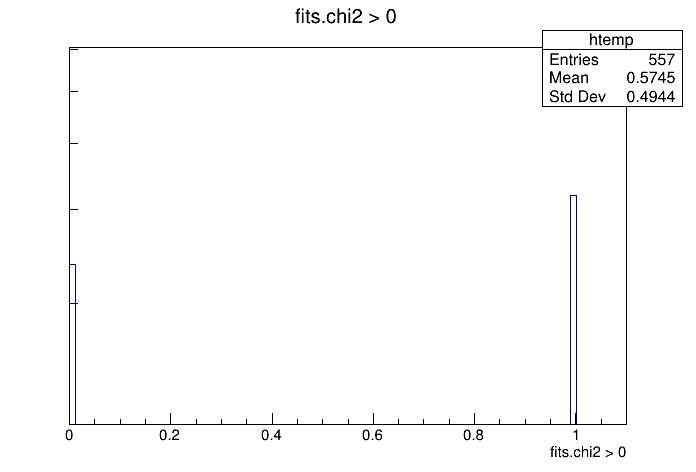

In [21]:
t.Draw("fits.chi2 > 0","","")
c.Draw()

In [22]:
counter = 0
limit = 3
for i, e in enumerate(t):
    for j, wf in enumerate(e.integrals):
        inti = e.fits[j]
        # if(wf.integral > 1e3 and inti.nfit > 1):
        # if(inti.nfit > 0 and inti.amplitudes[0] > 1e2):
        if(inti.chi2 < 0):
            fig,ax = plt.subplots(1,2,figsize=(15,5))
            plot_integral(wf,ax=ax[0])
            plot_pulse_fit(inti,f,ax=ax[1])
            ax[0].set_title("Pulse Integration Result")
            ax[1].set_title("Pulse Fit Result")
            plt.show()

            inti = e.fits[j]

            counter += 1
            if(counter > limit):
                break
    if(counter > limit):
        break
            

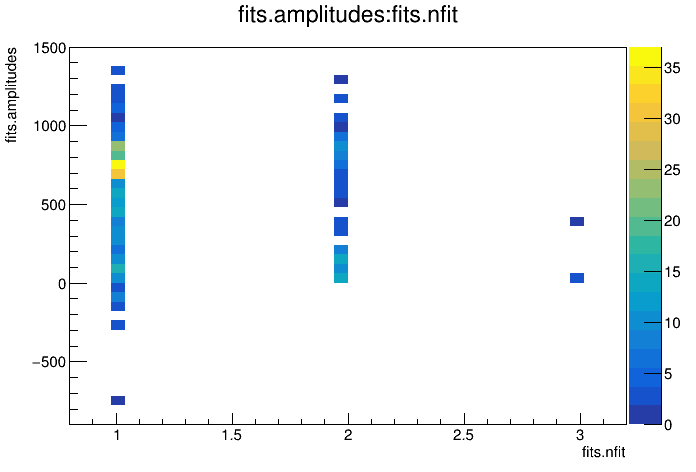

In [23]:
c = r.TCanvas()
t.Draw("fits.amplitudes:fits.nfit", "","colz")
# c.SetLogy()
c.Draw()

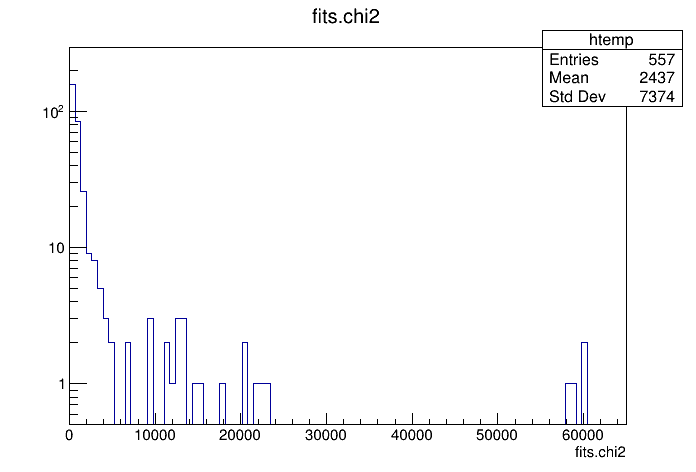

In [24]:
c = r.TCanvas()
t.Draw("fits.chi2", "","colz")
c.SetLogy()
c.Draw()

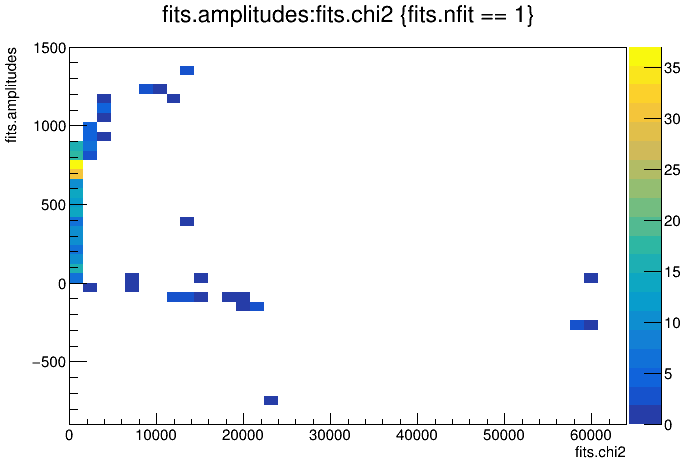

In [25]:
c = r.TCanvas()
t.Draw("fits.amplitudes:fits.chi2", "fits.nfit == 1","colz")
# c.SetLogy()
c.Draw()

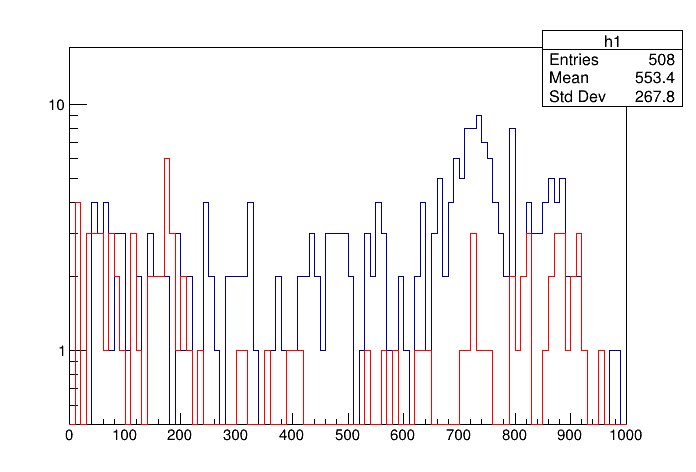

In [26]:
c = r.TCanvas()
h1 = r.TH1D("h1","", 100,0,1000)
h2 = r.TH1D("h2","", 100,0,1000)
h2.SetLineColor(2)
t.Draw("fits.amplitudes>>h1", "fits.nfit == 1","")
t.Draw("fits.amplitudes>>h2", "fits.nfit == 2","same")
c.SetLogy()
c.Draw()

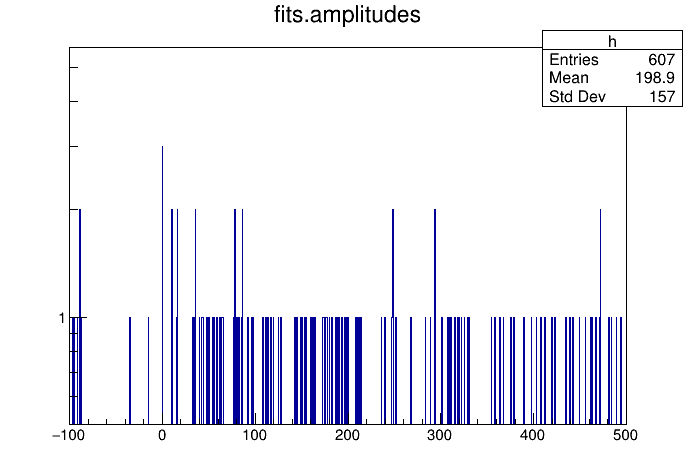

In [27]:
c = r.TCanvas()
t.Draw("fits.amplitudes>>h(1000,-100,500)", "","")
c.SetLogy()
c.Draw()

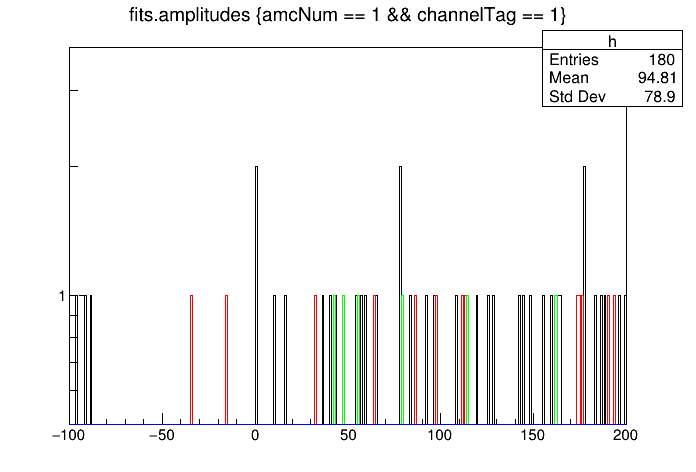

In [28]:
c = r.TCanvas()
t.Draw("fits.amplitudes>>h(300,-100,200)", "amcNum == 1 && channelTag == 1","")
# t.Draw("fits.amplitudes>>h2(1000,-100,500)", "amcNum == 1 && channelTag == 0","same")
for amc in range(1,3):
    for channel in range(5):
        hname = f"h_{amc}_{channel}"
        hi = r.TH1D(hname, "", 300,-100,200)
        hi.SetLineColor(channel)
        t.Draw(f"fits.amplitudes>>{hname}", f"amcNum == {amc} && channelTag == {channel}","goff")
        hi.DrawCopy("same")
c.SetLogy()
c.Draw()

Error in <TTreeFormula::DefinedVariable>: integrals is not a datamember of dataProducts::WaveformIntegral
Error in <TTreeFormula::Compile>:  Bad numerical expression : "integrals.integrals"
Info in <TSelectorDraw::AbortProcess>: Variable compilation failed: {integrals.integrals,amcNum == 1 && channelTag == 1}


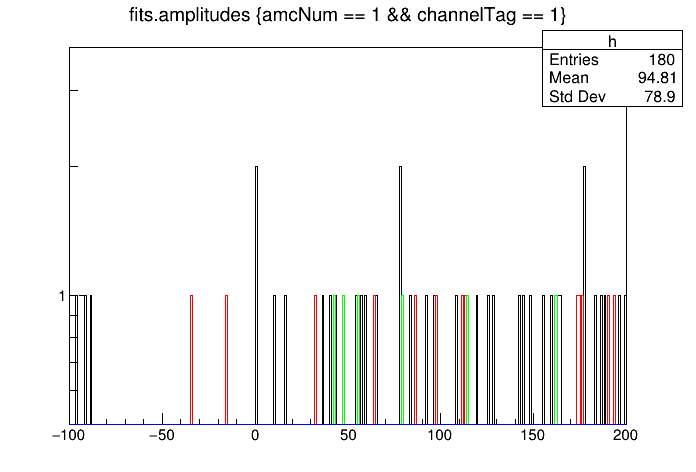

In [29]:
t.Draw("integrals.integrals", "amcNum == 1 && channelTag == 1","")
c.Draw()

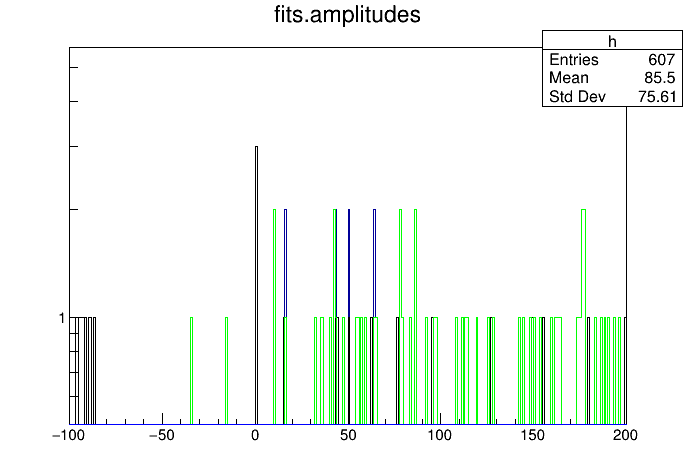

In [30]:
c = r.TCanvas()
t.Draw("fits.amplitudes>>h(300,-100,200)", "","")
# t.Draw("fits.amplitudes>>h2(1000,-100,500)", "amcNum == 1 && channelTag == 0","same")
for amc in range(1,3):
    for channel in range(5):
        hname = f"h_{amc}_{channel}"
        hi = r.TH1D(hname, "", 300,-100,200)
        hi.SetLineColor(channel)
        t.Draw(f"fits.amplitudes>>{hname}", f"fits.amcNum == {amc} && fits.channelTag == {channel}","goff")
        hi.DrawCopy("same")
c.SetLogy()
c.Draw()

In [31]:
n = t.Draw("Entry$", "fits.amplitudes < -10000","")
entries = [int(t.GetV1()[i]) for i in range(n)]
entries

[]

Error in <THistPainter::PaintInit>: log scale requested with a negative argument (-1.000000)


In [32]:
for i in entries:
    t.GetEntry(i)
    for intj in t.fits:
        if np.any(np.array(intj.amplitudes) < -10000):
            plot_pulse_fit(intj,f)
            plt.show()

In [33]:
f.Get("splines/spline_2_0")

In [34]:
inti.Show()

out_of_range: void dataProducts::WaveformFit::Show() =>
    out_of_range: vector::_M_range_check: __n (which is 0) >= this->size() (which is 0)

In [ ]:
spline = inti.spline.GetObject()
spline

In [ ]:
c = r.TCanvas()
spline.Draw()
c.Draw()

In [ ]:
spline.GetXmax()